In [85]:
### Using Python to conduct moving average anslysis to indentify trade entry signals and trade exit signals for Disney 

import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


In [81]:
# read Disney's historical stock price price from yahoo finance

start = dt.datetime(2016,1,1)
end = dt.datetime(2017,10,24)

df = pdr.get_data_yahoo('DIS',start,end)
#df.to_csv('DIS.csv')

print(df.head())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-04  103.120003  103.430000  101.730003  102.980003  100.706276   
2016-01-05  102.669998  102.669998   99.889999  100.900002   98.672195   
2016-01-06   99.379997  101.459999   99.360001  100.360001   98.144112   
2016-01-07   98.959999  101.349998   98.519997   99.500000   97.303101   
2016-01-08  100.629997  100.919998   99.000000   99.250000   97.058617   

              Volume  
Date                  
2016-01-04  12531500  
2016-01-05  16212900  
2016-01-06  13934500  
2016-01-07  14680200  
2016-01-08  10691600  


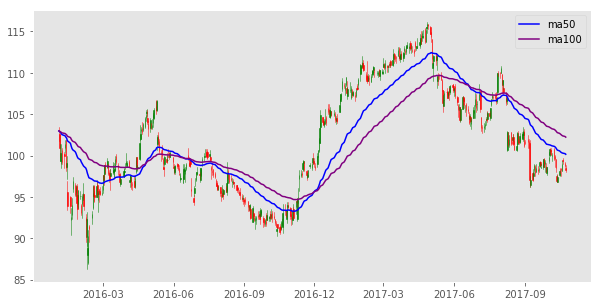

In [84]:
# Draw Candlestick chart

from matplotlib.finance import candlestick2_ohlc
from matplotlib.dates import num2date
import matplotlib.dates as mdates

# compute the simple moving average
df['MA50'] = df['Close'].ewm(span=50, adjust=False).mean()
df['MA100'] = df['Close'].ewm(span=100, adjust=False).mean()


# convert date format for ohlc to operate
df['Date'] = df.index.map(mdates.date2num)
ohlc = df[['Date','Open','High','Low','Close']]

f1, ax = plt.subplots(figsize = (10,5))

# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# plot the moving average lines
ax.plot(df.index, df['MA50'], color = 'blue', label = 'ma50')
ax.plot(df.index, df['MA100'], color = 'purple', label = 'ma100')

# other parameters
ax.grid(False)
ax.legend()


plt.show()

In [46]:
# Initialize the short and long windows

short_window = 40     # take today's stock price and previous 39 days' stock price data
long_window = 100      # take today's stock price and previous 99 days' stock price data

# Initialize the signals DataFrame with 'signal' column into current DataFrame
signals = pd.DataFrame(index = df.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
# Create long simple moving average over the long window
signals['short_mavg'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
signals['long_mavg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]>signals['long_mavg'][short_window:], 1.0, 0.0) 

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print 'signals'
print(signals.head())

            signal  short_mavg  long_mavg  positions
Date                                                
2010-01-04     0.0     32.0700    32.0700        NaN
2010-01-05     0.0     32.0300    32.0300        0.0
2010-01-06     0.0     31.9600    31.9600        0.0
2010-01-07     0.0     31.9275    31.9275        0.0
2010-01-08     0.0     31.9180    31.9180        0.0


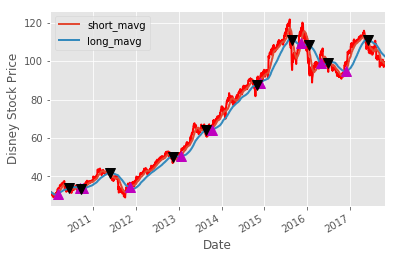

In [47]:
fig = plt.figure()

#Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,ylabel = 'Disney Stock Price')

# Plot the closing price
df['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index,signals.short_mavg[signals.positions == 1.0],'^', markersize=10, color='m')

# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index,signals.short_mavg[signals.positions == -1.0],'v', markersize=10, color='k')

# Show the plot
plt.show()